<a href="https://colab.research.google.com/github/Rizwanali324/ML_projects/blob/main/onlinefraud_detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
import os

# Create the Kaggle directory
!mkdir -p ~/.kaggle

# Move the Kaggle API key to the Kaggle directory
!mv kaggle.json ~/.kaggle/


In [4]:
# Set permissions for the Kaggle API key file
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

100% 177M/178M [00:09<00:00, 23.6MB/s]
100% 178M/178M [00:09<00:00, 19.3MB/s]


In [6]:
# Step 5: Unzip the downloaded dataset
!unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
  inflating: onlinefraud.csv         


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/onlinefraud.csv")

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# #**EDA**

In [9]:
df.keys()

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

#Drop Irrelative columns

In [14]:
df.drop(['step','isFlaggedFraud','nameOrig'],inplace=True,axis=1)

In [15]:
df.sample(6)

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3119157,CASH_OUT,18441.09,1004.00,0.00,C1520243986,51574.00,70015.09,0
1523097,PAYMENT,38213.89,37037.45,0.00,M1007540235,0.00,0.00,0
4519562,CASH_OUT,217615.20,0.00,0.00,C1216392551,318159.18,535774.38,0
2532865,PAYMENT,510.06,20353.00,19842.94,M1140657753,0.00,0.00,0
4724553,PAYMENT,14409.19,964.00,0.00,M526912950,0.00,0.00,0
772341,CASH_OUT,309936.79,37596.00,0.00,C1863424165,0.00,309936.79,0


In [16]:
df.drop(['nameDest'],inplace=True,axis=1)

In [17]:
df.sample(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
385352,CASH_IN,208315.11,129394.26,337709.38,517936.85,495530.36,0
5835195,CASH_IN,291209.90,52297.00,343506.90,0.00,0.00,0
419418,CASH_IN,331958.08,132487.00,464445.08,920227.28,567954.28,0
5997237,PAYMENT,5341.12,1754.00,0.00,0.00,0.00,0
2627934,CASH_IN,22985.56,50492.00,73477.56,45153.71,22168.15,0


In [18]:
df.keys()

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
# Loop through each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'type':
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

Unique values in column 'amount':
[9.83964000e+03 1.86428000e+03 1.81000000e+02 ... 3.39682130e+05
 6.31140928e+06 8.50002520e+05]

Unique values in column 'oldbalanceOrg':
[1.70136000e+05 2.12490000e+04 1.81000000e+02 ... 3.39682130e+05
 6.31140928e+06 8.50002520e+05]

Unique values in column 'newbalanceOrig':
[1.60296360e+05 1.93847200e+04 0.00000000e+00 ... 2.56745479e+07
 1.56745479e+07 5.67454789e+06]

Unique values in column 'oldbalanceDest':
[      0.     21182.     41898.   ...  503464.5    68488.84 6510099.11]

Unique values in column 'newbalanceDest':
[      0.     40348.79  157982.12 ... 1762283.33 6379898.11 7360101.63]

Unique values in column 'isFraud':
[0 1]



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 339.8+ MB


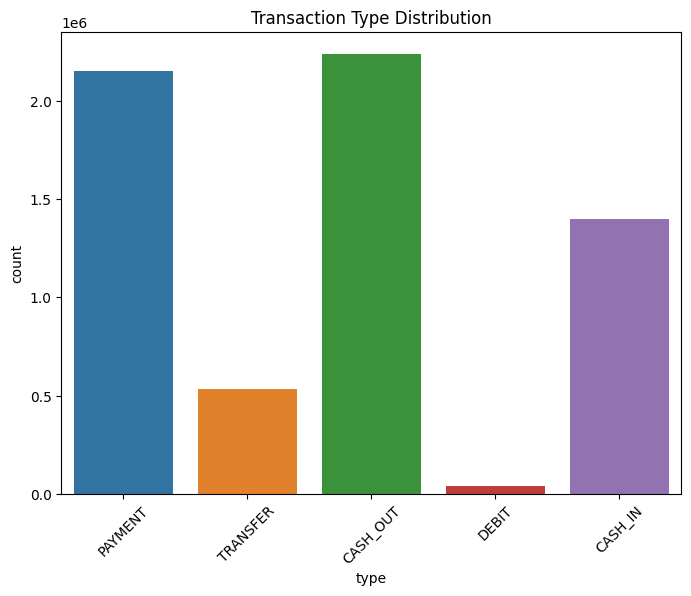

In [21]:
# Transaction Type Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)
plt.show()

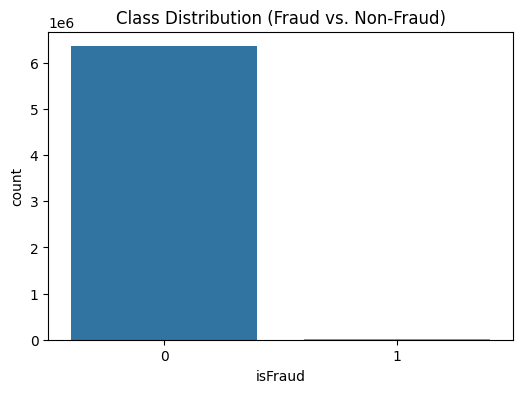

In [22]:
# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud')
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.show()

In [24]:
df.sample(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4916863,PAYMENT,11861.99,0.0,0.00,0.0,0.00,0
1488092,PAYMENT,7490.39,0.0,0.00,0.0,0.00,0
4733515,PAYMENT,4647.28,33446.0,28798.72,0.0,0.00,0
2403461,PAYMENT,1303.25,5753.0,4449.75,0.0,0.00,0
1948003,CASH_OUT,244196.40,17556.0,0.00,0.0,577291.73,0


In [25]:
df=pd.get_dummies(df,drop_first=True)
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


# #Without blancing class

In [26]:
from pandas.io.formats.info import DataFrameInfoPrinter
from sklearn.model_selection import train_test_split

# Assuming 'isFraud' is the target column, you should exclude it from X
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5090096, 9)
X_test shape: (1272524, 9)
y_train shape: (5090096,)
y_test shape: (1272524,)


In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
accuracy = model.score(X_test, y_test)
print(f"Logistic Regression - Accuracy: {accuracy:.2f}")


Logistic Regression - Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
model.fit(X_train, y_train)

# Calculate the training and testing scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Logistic Regression - Training Score: {train_score:.2f}")
print(f"Logistic Regression - Testing Score: {test_score:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Score: 1.00
Logistic Regression - Testing Score: 1.00


#Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_rep)




Accuracy: 1.00
F1 Score: 0.55
ROC AUC Score: 0.70

Confusion Matrix:
[[1270834      70]
 [    983     637]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



The provided evaluation metrics and confusion matrix describe the performance of a classification model, which, in this case, is a Logistic Regression model for fraud detection. Let's interpret the results:

1. **F1 Score: 0.55**:
   - The F1 Score is the harmonic mean of precision and recall.
   - It is a balanced metric that considers both false positives and false negatives.
   - An F1 Score of 0.55 suggests that the model achieves a reasonable balance between precision and recall, but it's not extremely high. This means the model is decent at identifying fraud while minimizing false alarms.

2. **ROC AUC Score: 0.70**:
   - The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) Score measures the model's ability to distinguish between classes.
   - An ROC AUC score of 0.70 indicates that the model has a good ability to differentiate between fraudulent and non-fraudulent transactions.

3. **Confusion Matrix**:
   - The confusion matrix shows how the model's predictions compare to the actual classes.
   - The top-left cell (1270834) represents the true negatives (TN) - the number of non-fraudulent transactions correctly classified as non-fraudulent.
   - The top-right cell (70) represents the false positives (FP) - the number of non-fraudulent transactions incorrectly classified as fraudulent.
   - The bottom-left cell (983) represents the false negatives (FN) - the number of fraudulent transactions incorrectly classified as non-fraudulent.
   - The bottom-right cell (637) represents the true positives (TP) - the number of fraudulent transactions correctly classified as fraudulent.

Interpretation of the confusion matrix:
- The model correctly identified 637 transactions as fraudulent (TP).
- It correctly classified 1,270,834 transactions as non-fraudulent (TN).
- There were 70 false alarms where non-fraudulent transactions were incorrectly classified as fraudulent (FP).
- The model missed 983 fraudulent transactions (FN).

In summary, the model is decent at identifying fraud with a reasonable balance between precision and recall, and it has a good ability to differentiate between classes, as indicated by the ROC AUC score. However, there is room for improvement, especially in reducing false negatives (fraudulent transactions that are missed) and false positives (non-fraudulent transactions incorrectly flagged as fraud). Depending on the specific use case, you might consider adjusting the model's threshold or exploring different feature engineering and modeling approaches to further enhance its performance.